 # Project: Dog Breed Classification




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [0]:
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
import vis
from keras.models import Model

Using TensorFlow backend.


### Load Dataset Files

Now, upload the given dataset file shared with you in your google drive and give its path for the below given project_path variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/ComputerVision_with_CNNs/Dog_Breed/"
os.chdir(project_path)

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
# from zipfile import ZipFile
# with ZipFile(project_path+'dog-breed-identification.zip', 'r') as z:
#   z.extractall()

In [6]:
ls -l

total 733460
-rw------- 1 root root    482063 Dec 22 08:35  labels.csv
-rw------- 1 root root    218954 Dec 22 08:28  labels.csv.zip
-rw------- 1 root root    841658 Dec 22 11:57  R8_DogBreed_CNN_Nag.ipynb
-rw------- 1 root root    288160 Dec 22 09:03  sample_submission1.csv.zip
-rw------- 1 root root  25200295 Dec 22 08:46  sample_submission.csv
drwx------ 2 root root      4096 Dec 22 08:46 'sample_submission.csv (Unzipped Files)'/
drwx------ 2 root root      4096 Dec 22 10:28  test/
-rw------- 1 root root 362738853 Dec 22 08:27  test.zip
drwx------ 2 root root      4096 Dec 22 10:29  train/
-rw------- 1 root root 361279070 Dec 22 08:27  train.zip



After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas


In [0]:
from zipfile import ZipFile

with ZipFile(project_path+'test.zip', 'r') as z:
   z.extractall()
with ZipFile(project_path+'train.zip', 'r') as z:
   z.extractall()


In [0]:
labels_df = pd.read_csv('labels.csv')

### Print the count of each category of Dogs given in the dataset


In [9]:
labels_df.groupby(by='breed').count()


,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
...,...
welsh_springer_spaniel,79
west_highland_white_terrier,81
whippet,95


In [10]:
labels_df.isnull()

,id,breed
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
10217,False,False
10218,False,False
10219,False,False
10220,False,False


**No missing values observed**

### Data Representation & Feature Engineering 

In [0]:
# Get one-hot encodings of labels

In [12]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
labels_en_df = pd.get_dummies(labels_df.breed)


In [14]:
labels_en_df.head(10)


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Preparing training dataset


In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_train = []
y_train = []

In [17]:
for f, img in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [01:31<00:00, 112.25it/s]


In [18]:
x_train[0]

array([[[ 69, 116, 173],
        [ 38,  91, 136],
        [102, 166, 204],
        ...,
        [130, 204, 237],
        [ 85, 193, 220],
        [ 59, 138, 170]],

       [[ 42,  77, 118],
        [142, 180, 216],
        [119, 162, 197],
        ...,
        [ 80, 152, 194],
        [101, 183, 218],
        [ 74, 177, 212]],

       [[ 65, 107, 151],
        [ 57, 103, 147],
        [ 66, 107, 153],
        ...,
        [ 37, 121, 172],
        [ 73, 145, 183],
        [ 64, 168, 207]],

       ...,

       [[ 77, 119, 190],
        [ 66, 121, 186],
        [ 66, 122, 183],
        ...,
        [ 70,  91, 159],
        [ 59,  89, 154],
        [ 91, 132, 184]],

       [[ 65, 118, 185],
        [ 72, 124, 190],
        [ 74, 125, 187],
        ...,
        [ 54,  63, 132],
        [ 74, 116, 169],
        [121, 169, 223]],

       [[ 63, 116, 183],
        [ 73, 125, 191],
        [ 76, 127, 190],
        ...,
        [ 50,  51, 127],
        [ 31,  62, 128],
        [ 90, 145, 198]]

boston_bull


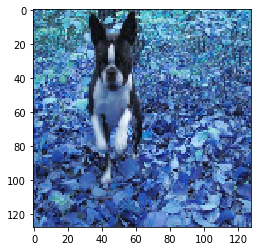

dingo


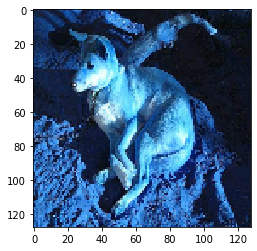

pekinese


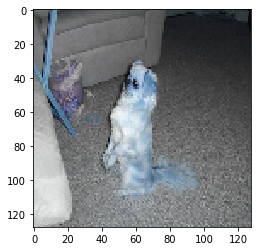

bluetick


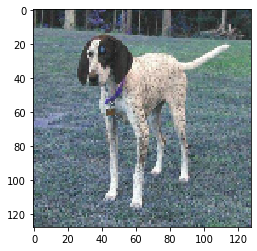

golden_retriever


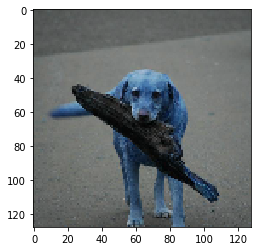

In [19]:
for i in range(5):
    plt.imshow(x_train[i])
    print (y_train[i])
    #plt.ylabel=y_train[i]
    plt.show()

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model



In [0]:
x_train_conv = np.array(x_train)


In [21]:
x_train_conv.shape


(10222, 128, 128, 3)

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255


In [0]:
y_train_class = pd.get_dummies(y_train)


In [24]:
y_train_class.shape


(10222, 120)

### Split the training and validation data from x_train_conv and y_train_class obtained from above step

In [0]:
### Split the Dataset
X_train, X_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.3, random_state=7)

### Loading the test data


Read the id column from the samples_submission.csv and store it in test_img



In [0]:
test_img_df = pd.read_csv('sample_submission.csv',usecols=[0])


In [27]:
test_img_df.head(10)


,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e
5,00225dcd3e4d2410dd53239f95c0352f
6,002c2a3117c2193b4d26400ce431eebd
7,002c58d413a521ae8d1a5daeb35fc803
8,002f80396f1e3db687c5932d7978b196
9,0036c6bcec6031be9e62a257b1c3c442


Run the below code to load the test image files in x_test_feature



In [28]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img_df.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [01:31<00:00, 113.28it/s]


Normalize the test data and convert it into 4 dimensions



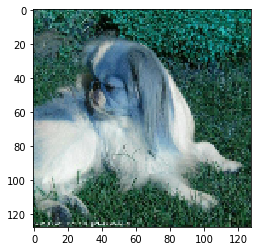

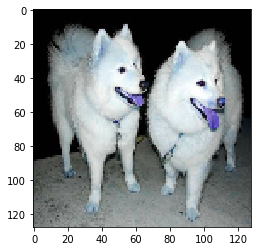

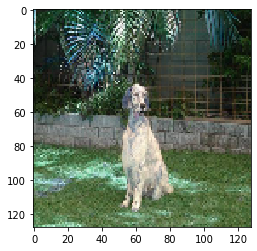

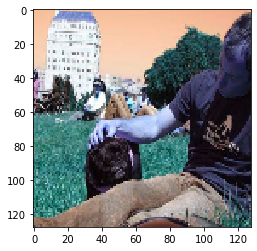

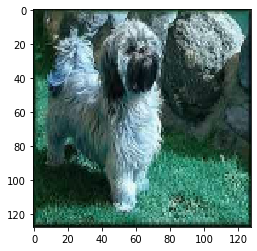

In [29]:
for i in range(5):
    plt.imshow(x_test_feature[i])
    plt.show()


In [0]:
x_test_conv = np.array(x_test_feature)

In [31]:
x_test_conv.shape

(10357, 128, 128, 3)

## Model Creation

In [32]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (5, 3), activation='relu', input_shape=(128, 128, 3)))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Conv2D(32, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

In [0]:
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))
model_conv.add(Dense(120, activation='softmax'))

In [34]:
model_conv.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

### Execute the model


In [35]:
model_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [36]:
%%time 
output_conv = model_conv.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7155 samples, validate on 3067 samples
Epoch 1/10





 - 109s - loss: 4.7928 - acc: 0.0116 - val_loss: 4.7894 - val_acc: 0.0101
Epoch 2/10
 - 107s - loss: 4.7834 - acc: 0.0113 - val_loss: 4.7864 - val_acc: 0.0117
Epoch 3/10
 - 107s - loss: 4.7797 - acc: 0.0120 - val_loss: 4.7846 - val_acc: 0.0098
Epoch 4/10
 - 109s - loss: 4.7764 - acc: 0.0127 - val_loss: 4.7834 - val_acc: 0.0095
Epoch 5/10
 - 108s - loss: 4.7733 - acc: 0.0134 - val_loss: 4.7821 - val_acc: 0.0114
Epoch 6/10
 - 108s - loss: 4.7701 - acc: 0.0158 - val_loss: 4.7802 - val_acc: 0.0121
Epoch 7/10
 - 109s - loss: 4.7663 - acc: 0.0169 - val_loss: 4.7786 - val_acc: 0.0117
Epoch 8/10
 - 108s - loss: 4.7619 - acc: 0.0154 - val_loss: 4.7759 - val_acc: 0.0108
Epoch 9/10
 - 109s - loss: 4.7567 - acc: 0.0184 - val_loss: 4.7718 - val_acc: 0.0130
Epoch 10/10
 - 108s - loss: 4.7496 - acc: 0.0193 - val_loss: 4.7686 - val_acc: 0.0121

### The model accuracy is very poor.


## Training and Evaluation

### Run Multiple Experiments

In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [0]:
data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, 
                          samplewise_std_normalization=True,  
                          rotation_range=90,       
                          width_shift_range=0.2,   
                          height_shift_range=0.2,  
                          fill_mode='reflect',     
                          zoom_range=0.4,          
                          horizontal_flip=True,    
                          vertical_flip=True)      

Using the above objects, create the image generators with variable names train_generator and val_generator

We  need to use train_datagen.flow() and val_datagen.flow()



In [0]:
train_generator = data.flow(X_train, y_train, batch_size=128)


In [0]:
val_generator = data.flow(X_val,y_val,batch_size = 128)


### Fit the model using fit_generator() using train_generator and val_generator from the above step with 10 epochs

In [41]:
output_imggen = model_conv.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2, steps_per_epoch=20, validation_steps=80)


Epoch 1/10
 - 138s - loss: 4.7936 - acc: 0.0102 - val_loss: 4.7923 - val_acc: 0.0108
Epoch 2/10
 - 133s - loss: 4.7791 - acc: 0.0102 - val_loss: 4.7866 - val_acc: 0.0102
Epoch 3/10
 - 132s - loss: 4.7709 - acc: 0.0102 - val_loss: 4.7740 - val_acc: 0.0135
Epoch 4/10
 - 133s - loss: 4.7661 - acc: 0.0141 - val_loss: 4.7761 - val_acc: 0.0127
Epoch 5/10
 - 133s - loss: 4.7749 - acc: 0.0098 - val_loss: 4.7684 - val_acc: 0.0150
Epoch 6/10
 - 132s - loss: 4.7610 - acc: 0.0091 - val_loss: 4.7634 - val_acc: 0.0135
Epoch 7/10
 - 132s - loss: 4.7576 - acc: 0.0113 - val_loss: 4.7667 - val_acc: 0.0153
Epoch 8/10
 - 131s - loss: 4.7548 - acc: 0.0137 - val_loss: 4.7629 - val_acc: 0.0129
Epoch 9/10
 - 133s - loss: 4.7507 - acc: 0.0113 - val_loss: 4.7575 - val_acc: 0.0139
Epoch 10/10
 - 132s - loss: 4.7451 - acc: 0.0181 - val_loss: 4.7584 - val_acc: 0.0142


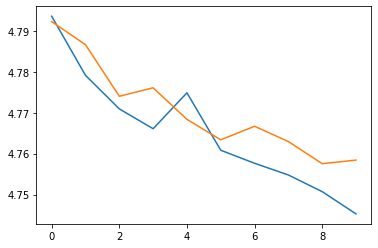

In [42]:
plt.plot(model_conv.history.history["loss"])
plt.plot(model_conv.history.history["val_loss"])

In [43]:
loss_and_metrics = model_conv.evaluate(X_val,y_val)
print(loss_and_metrics)

3067/3067 [==============================] - 16s 5ms/step
[4.764774232646095, 0.011411803064884252]


In [44]:
loss_and_metrics=model_conv.evaluate(X_train,y_train)

7155/7155 [==============================] - 34s 5ms/step


In [45]:
loss_and_metrics

[4.7473903394761745, 0.016911250875597646]

In [46]:
output_conv.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

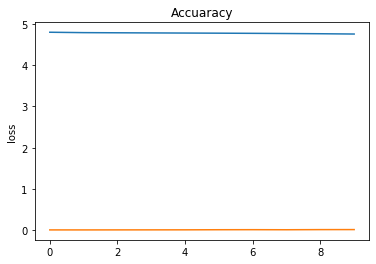

In [47]:
# summarize history for loss
plt.title('Loss vs Accuracy')
plt.plot(output_conv.history['loss'])
plt.plot(output_conv.history['acc'])
plt.ylabel('loss')
plt.title('Accuaracy')
plt.show()